In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random 
import librosa, IPython
import librosa.display 

seed = 12
np.random.seed(seed)

In [33]:
df = pd.read_csv(r'C:\Users\PARTH\Desktop\be project\GTZAN DATASET\archive\Data\features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [34]:
print("Dataset has",df.shape)
print("Count of Positive and Negative samples")
df.label.value_counts().reset_index()

Dataset has (9990, 60)
Count of Positive and Negative samples


,index,label
0,reggae,1000
1,metal,1000
2,blues,1000
3,jazz,1000
4,pop,1000
5,disco,999
6,classical,998
7,rock,998
8,hiphop,998
9,country,997


## Data Visualization

In [35]:
#Performing visualization on 1 audio track of Blues genre

In [36]:
audio_fp = r'C:\Users\PARTH\Desktop\be project\GTZAN DATASET\archive\Data/genres_original/blues/blues.00000.wav'
#audio_data, sr = librosa.load(audio_fp)

audio_data, sr=librosa.load(audio_fp)
#audio_data, _ = librosa.effects.trim(audio_data)

In [37]:
IPython.display.Audio(audio_data, rate=sr)

[]

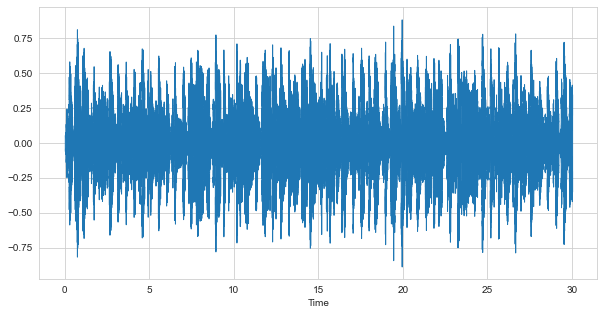

In [41]:
# plot sample file
plt.figure(figsize=(10,5))
librosa.display.waveshow(audio_data)
plt.plot()

#librosa.display.waveplot(y,sr);

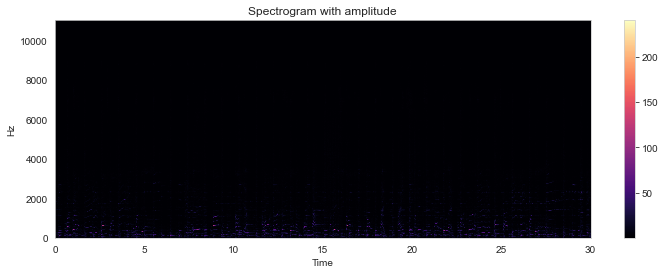

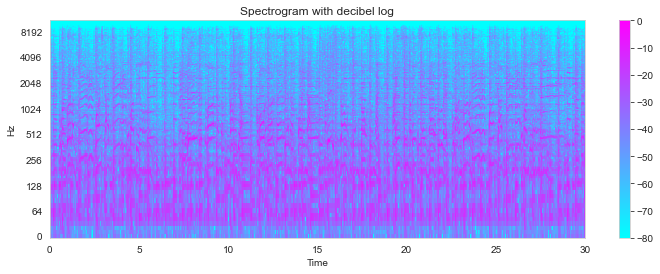

In [46]:
# Default FFT window size
n_fft =2048 #Window Size
hop_length = 512 # window hop length for STFT

stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(stft, ref=np.max)

plt.figure(figsize=(12,4))
lplt.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title("Spectrogram with amplitude")
plt.show()

plt.figure(figsize=(12,4))
lplt.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Spectrogram with decibel log")
plt.show()

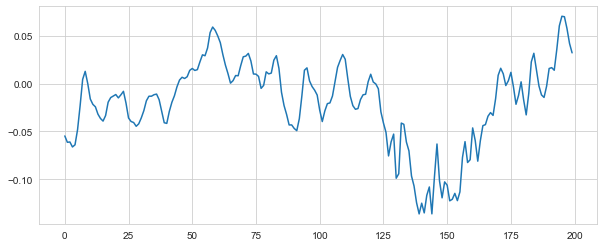

In [49]:
#Plot zoomed audio wave 
start = 1000
end = 1200
plt.figure(figsize=(10,4))
plt.plot(audio_data[start:end])
plt.show()

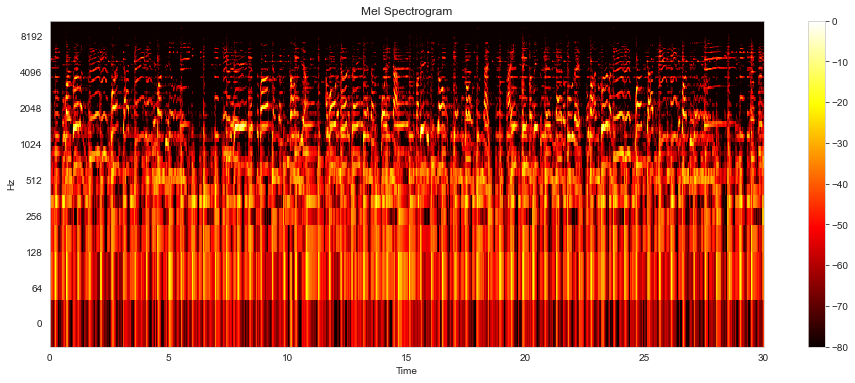

In [56]:
mel_spec = librosa.feature.melspectrogram(y=audio_data, sr=sr)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.figure(figsize=(16,6))
lplt.specshow(mel_spec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='hot')
plt.colorbar()
plt.title("Mel Spectrogram")
plt.show()

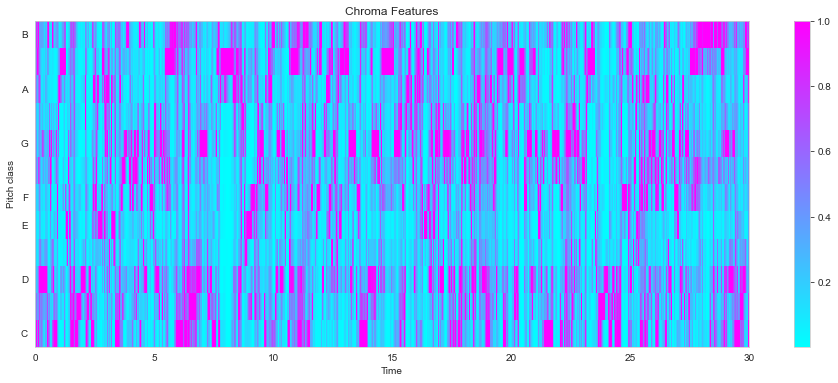

In [59]:
chroma = librosa.feature.chroma_stft(y=audio_data, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='cool')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

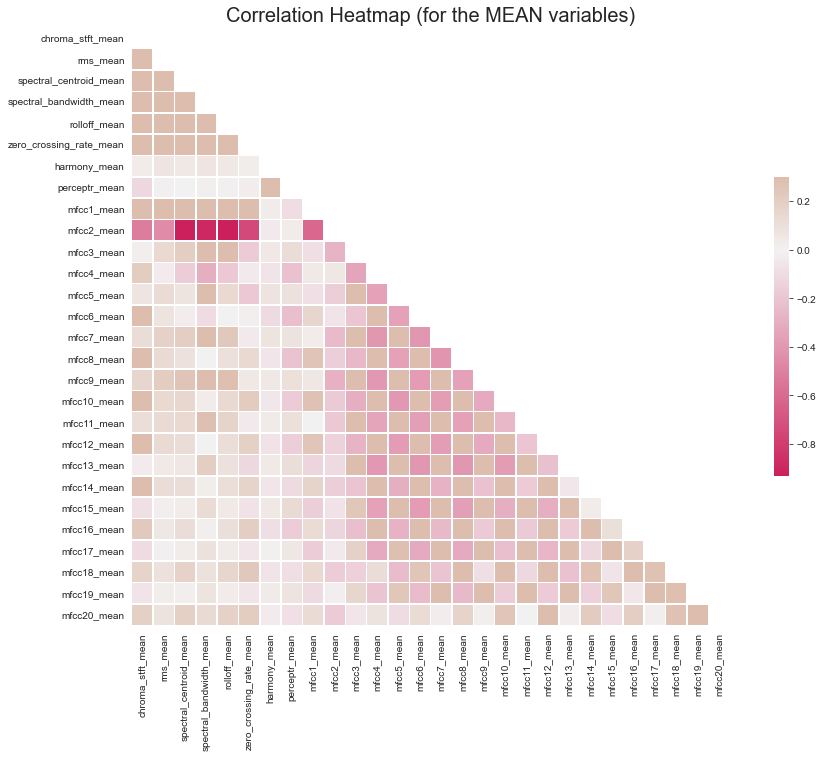

In [64]:
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr_Heatmap.png")

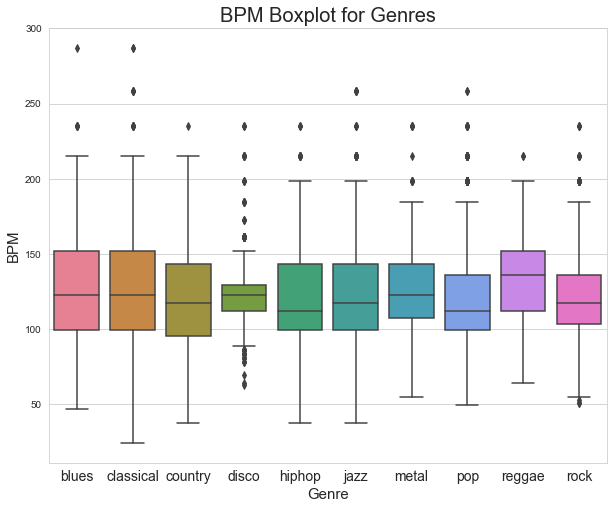

In [66]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(10, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

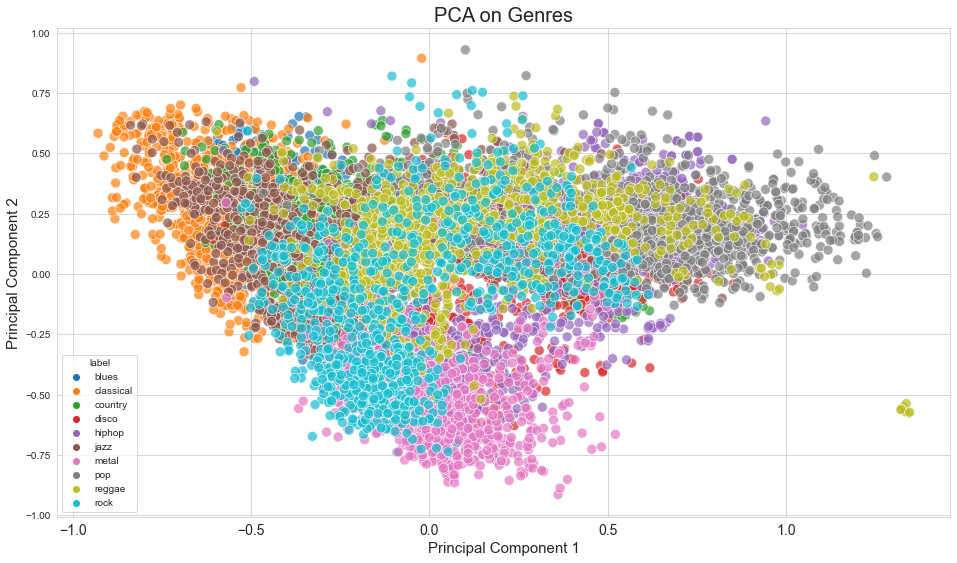

In [67]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")

## Data preparation

In [68]:
print("Columns with NA values are",list(df.columns[df.isnull().any()]))

Columns with NA values are []


In [69]:
# map labels to index
label_index = dict()
index_label = dict()
for i, x in enumerate(df.label.unique()):
    label_index[x] = i
    index_label[i] = x
print(label_index)
print(index_label)

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}


In [70]:
# update labels in df to index
df.label = [label_index[l] for l in df.label]

In [71]:
# shuffle samples
df_shuffle = df.sample(frac=1, random_state=seed).reset_index(drop=True)

In [72]:
# remove irrelevant columns
df_shuffle.drop(['filename', 'length'], axis=1, inplace=True)
df_y = df_shuffle.pop('label')
df_X = df_shuffle

# split into train dev and test
X_train, df_test_valid_X, y_train, df_test_valid_y = skms.train_test_split(df_X, df_y, train_size=0.7, random_state=seed, stratify=df_y)
X_dev, X_test, y_dev, y_test = skms.train_test_split(df_test_valid_X, df_test_valid_y, train_size=0.66, random_state=seed, stratify=df_test_valid_y)

In [73]:
print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Dev set has {X_dev.shape[0]} records out of {len(df_shuffle)} which is {round(X_dev.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")

Train set has 6993 records out of 9990 which is 70%
Dev set has 1978 records out of 9990 which is 20%
Test set has 1019 records out of 9990 which is 10%


In [74]:
print(y_train.value_counts()[0]/y_train.shape[0]*100)
print(y_dev.value_counts()[0]/y_dev.shape[0]*100)
print(y_test.value_counts()[0]/y_test.shape[0]*100)

10.01001001001001
10.010111223458038
10.009813542688912


In [75]:
scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_dev = pd.DataFrame(scaler.transform(X_dev), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [77]:
import tensorflow as tf
print("TF version:-", tf.__version__)
import tensorflow.keras as k
tf.random.set_seed(seed)

TF version:- 2.1.0


In [87]:
ACCURACY_THRESHOLD = 0.94

class myCallback(k.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

def trainModel(model, epochs, optimizer):
    batch_size = 128
    callback = myCallback()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
    )
    return model.fit(X_train, y_train, validation_data=(X_dev, y_dev), epochs=epochs, 
                     batch_size=batch_size, callbacks=[callback])

def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [89]:
model_1 = k.models.Sequential([
    k.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dense(10, activation='softmax'),
])
print(model_1.summary())
model_1_history = trainModel(model=model_1, epochs=70, optimizer='adam')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               14848     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 56,650
Trainable params: 56,650
Non-trainable params: 0
_________________________________________________________________
None
Train on 6993 samples, validate on 1978 samples
Epoch 1/70
6993/6993 [==============================] - 4s 504us/sample - loss: 1.4742 - accuracy: 0.4879 - val_loss: 1.0459 - val_accuracy: 0.6390
Epoch 2/70
6993/6993 [=========================

Epoch 50/70
6993/6993 [==============================] - 1s 105us/sample - loss: 0.0081 - accuracy: 0.9987 - val_loss: 0.5032 - val_accuracy: 0.8928
Epoch 51/70
6993/6993 [==============================] - 1s 98us/sample - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.5016 - val_accuracy: 0.8959
Epoch 52/70
6993/6993 [==============================] - 1s 99us/sample - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.5089 - val_accuracy: 0.8953
Epoch 53/70
6993/6993 [==============================] - 1s 94us/sample - loss: 0.0054 - accuracy: 0.9989 - val_loss: 0.5195 - val_accuracy: 0.8943
Epoch 54/70
6993/6993 [==============================] - 1s 99us/sample - loss: 0.0043 - accuracy: 0.9990 - val_loss: 0.5254 - val_accuracy: 0.8923
Epoch 55/70
6993/6993 [==============================] - 1s 89us/sample - loss: 0.0056 - accuracy: 0.9990 - val_loss: 0.5322 - val_accuracy: 0.8923
Epoch 56/70
6993/6993 [==============================] - 1s 90us/sample - loss: 0.0064 - accuracy: 0.9984 - val

In [86]:
batch_size = 128
callback = myCallback()
model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Max. Validation Accuracy 0.89888775


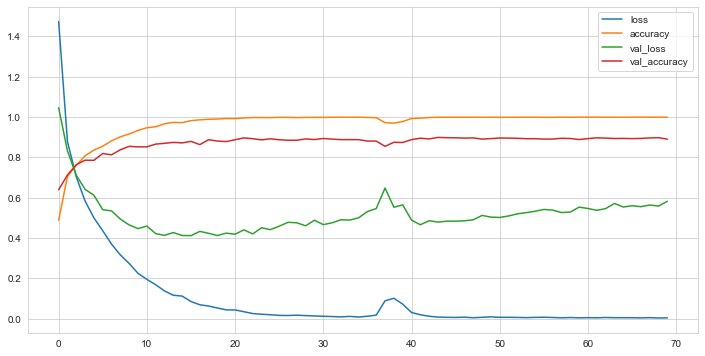

In [90]:
plotHistory(model_1_history)

In [91]:
model_2 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(10, activation='softmax'),
])
print(model_2.summary())
model_2_history = trainModel(model=model_2, epochs=100, optimizer='adam')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               29696     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)               

Epoch 100/100
6993/6993 [==============================] - 1s 93us/sample - loss: 0.0362 - accuracy: 0.9896 - val_loss: 0.3649 - val_accuracy: 0.9267


Max. Validation Accuracy 0.9282103


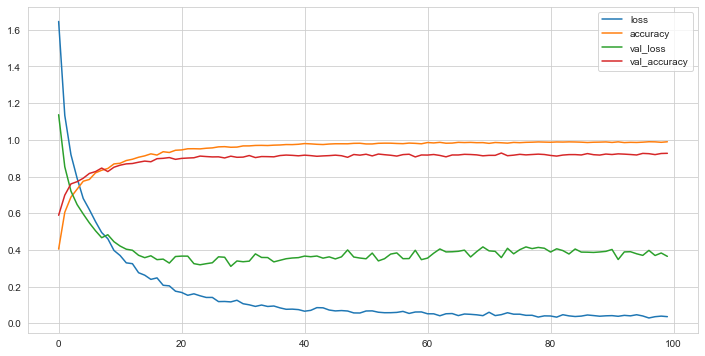

In [92]:
plotHistory(model_2_history)

In [93]:
model_3 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(10, activation='softmax'),
])
print(model_3.summary())
model_3_history = trainModel(model=model_3, epochs=700, optimizer='sgd')


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               29696     
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)               

Epoch 99/700
6993/6993 [==============================] - 1s 97us/sample - loss: 0.5989 - accuracy: 0.7941 - val_loss: 0.5677 - val_accuracy: 0.8023
Epoch 100/700
6993/6993 [==============================] - 1s 98us/sample - loss: 0.6048 - accuracy: 0.7967 - val_loss: 0.5689 - val_accuracy: 0.8038
Epoch 101/700
6993/6993 [==============================] - 1s 95us/sample - loss: 0.5924 - accuracy: 0.8014 - val_loss: 0.5645 - val_accuracy: 0.8049
Epoch 102/700
6993/6993 [==============================] - 1s 88us/sample - loss: 0.5973 - accuracy: 0.7988 - val_loss: 0.5612 - val_accuracy: 0.8054
Epoch 103/700
6993/6993 [==============================] - ETA: 0s - loss: 0.5926 - accuracy: 0.79 - 1s 90us/sample - loss: 0.5894 - accuracy: 0.7999 - val_loss: 0.5627 - val_accuracy: 0.7988
Epoch 104/700
6993/6993 [==============================] - 1s 90us/sample - loss: 0.5882 - accuracy: 0.7982 - val_loss: 0.5614 - val_accuracy: 0.8054
Epoch 105/700
6993/6993 [==============================] - 

Epoch 153/700
6993/6993 [==============================] - 1s 110us/sample - loss: 0.4171 - accuracy: 0.8606 - val_loss: 0.4439 - val_accuracy: 0.8498
Epoch 154/700
6993/6993 [==============================] - 1s 113us/sample - loss: 0.4189 - accuracy: 0.8579 - val_loss: 0.4410 - val_accuracy: 0.8534
Epoch 155/700
6993/6993 [==============================] - 1s 107us/sample - loss: 0.4064 - accuracy: 0.8659 - val_loss: 0.4404 - val_accuracy: 0.8544
Epoch 156/700
6993/6993 [==============================] - 1s 109us/sample - loss: 0.4069 - accuracy: 0.8620 - val_loss: 0.4367 - val_accuracy: 0.8549
Epoch 157/700
6993/6993 [==============================] - 1s 111us/sample - loss: 0.4082 - accuracy: 0.8633 - val_loss: 0.4330 - val_accuracy: 0.8519
Epoch 158/700
6993/6993 [==============================] - 1s 108us/sample - loss: 0.4084 - accuracy: 0.8589 - val_loss: 0.4373 - val_accuracy: 0.8524
Epoch 159/700
6993/6993 [==============================] - 1s 113us/sample - loss: 0.4031 - ac

6993/6993 [==============================] - 1s 98us/sample - loss: 0.2094 - accuracy: 0.9298 - val_loss: 0.3403 - val_accuracy: 0.8923
Epoch 262/700
6993/6993 [==============================] - 1s 95us/sample - loss: 0.2059 - accuracy: 0.9336 - val_loss: 0.3444 - val_accuracy: 0.8933
Epoch 263/700
6993/6993 [==============================] - 1s 89us/sample - loss: 0.2020 - accuracy: 0.9348 - val_loss: 0.3423 - val_accuracy: 0.8948
Epoch 264/700
6993/6993 [==============================] - 1s 90us/sample - loss: 0.2097 - accuracy: 0.9348 - val_loss: 0.3400 - val_accuracy: 0.8959
Epoch 265/700
6993/6993 [==============================] - 1s 93us/sample - loss: 0.2037 - accuracy: 0.9285 - val_loss: 0.3406 - val_accuracy: 0.8964
Epoch 266/700
6993/6993 [==============================] - 1s 88us/sample - loss: 0.2062 - accuracy: 0.9302 - val_loss: 0.3391 - val_accuracy: 0.8933
Epoch 267/700
6993/6993 [==============================] - 1s 94us/sample - loss: 0.2131 - accuracy: 0.9311 - val_

6993/6993 [==============================] - 1s 97us/sample - loss: 0.1210 - accuracy: 0.9630 - val_loss: 0.3221 - val_accuracy: 0.9090
Epoch 370/700
6993/6993 [==============================] - 1s 105us/sample - loss: 0.1132 - accuracy: 0.9651 - val_loss: 0.3211 - val_accuracy: 0.9070
Epoch 371/700
6993/6993 [==============================] - 1s 106us/sample - loss: 0.1249 - accuracy: 0.9595 - val_loss: 0.3222 - val_accuracy: 0.9110
Epoch 372/700
6993/6993 [==============================] - 1s 108us/sample - loss: 0.1206 - accuracy: 0.9607 - val_loss: 0.3220 - val_accuracy: 0.9065
Epoch 373/700
6993/6993 [==============================] - 1s 108us/sample - loss: 0.1112 - accuracy: 0.9620 - val_loss: 0.3213 - val_accuracy: 0.9105
Epoch 374/700
6993/6993 [==============================] - 1s 80us/sample - loss: 0.1193 - accuracy: 0.9600 - val_loss: 0.3228 - val_accuracy: 0.9110
Epoch 375/700
6993/6993 [==============================] - 0s 61us/sample - loss: 0.1220 - accuracy: 0.9612 - 

6993/6993 [==============================] - 1s 89us/sample - loss: 0.0819 - accuracy: 0.9743 - val_loss: 0.3247 - val_accuracy: 0.9151
Epoch 478/700
6993/6993 [==============================] - 1s 89us/sample - loss: 0.0795 - accuracy: 0.9751 - val_loss: 0.3285 - val_accuracy: 0.9120
Epoch 479/700
6993/6993 [==============================] - 1s 89us/sample - loss: 0.0824 - accuracy: 0.9733 - val_loss: 0.3252 - val_accuracy: 0.9146
Epoch 480/700
6993/6993 [==============================] - 1s 89us/sample - loss: 0.0807 - accuracy: 0.9741 - val_loss: 0.3227 - val_accuracy: 0.9171
Epoch 481/700
6993/6993 [==============================] - 1s 90us/sample - loss: 0.0758 - accuracy: 0.9778 - val_loss: 0.3221 - val_accuracy: 0.9156
Epoch 482/700
6993/6993 [==============================] - 1s 88us/sample - loss: 0.0756 - accuracy: 0.9751 - val_loss: 0.3213 - val_accuracy: 0.9156
Epoch 483/700
6993/6993 [==============================] - 1s 88us/sample - loss: 0.0751 - accuracy: 0.9775 - val_

6993/6993 [==============================] - 1s 105us/sample - loss: 0.0613 - accuracy: 0.9794 - val_loss: 0.3366 - val_accuracy: 0.9176
Epoch 586/700
6993/6993 [==============================] - 1s 105us/sample - loss: 0.0538 - accuracy: 0.9846 - val_loss: 0.3353 - val_accuracy: 0.9186
Epoch 587/700
6993/6993 [==============================] - 1s 105us/sample - loss: 0.0606 - accuracy: 0.9816 - val_loss: 0.3291 - val_accuracy: 0.9201
Epoch 588/700
6993/6993 [==============================] - 1s 103us/sample - loss: 0.0611 - accuracy: 0.9794 - val_loss: 0.3350 - val_accuracy: 0.9191
Epoch 589/700
6993/6993 [==============================] - 1s 96us/sample - loss: 0.0547 - accuracy: 0.9846 - val_loss: 0.3313 - val_accuracy: 0.9176
Epoch 590/700
6993/6993 [==============================] - 1s 97us/sample - loss: 0.0623 - accuracy: 0.9798 - val_loss: 0.3313 - val_accuracy: 0.9171
Epoch 591/700
6993/6993 [==============================] - 1s 88us/sample - loss: 0.0535 - accuracy: 0.9831 - 

6993/6993 [==============================] - 1s 108us/sample - loss: 0.0403 - accuracy: 0.9878 - val_loss: 0.3355 - val_accuracy: 0.9211
Epoch 694/700
6993/6993 [==============================] - 1s 111us/sample - loss: 0.0412 - accuracy: 0.9881 - val_loss: 0.3362 - val_accuracy: 0.9206
Epoch 695/700
6993/6993 [==============================] - 1s 124us/sample - loss: 0.0397 - accuracy: 0.9883 - val_loss: 0.3367 - val_accuracy: 0.9201
Epoch 696/700
6993/6993 [==============================] - 1s 110us/sample - loss: 0.0395 - accuracy: 0.9883 - val_loss: 0.3391 - val_accuracy: 0.9191
Epoch 697/700
6993/6993 [==============================] - 1s 105us/sample - loss: 0.0404 - accuracy: 0.9858 - val_loss: 0.3344 - val_accuracy: 0.9201
Epoch 698/700
6993/6993 [==============================] - 1s 104us/sample - loss: 0.0411 - accuracy: 0.9866 - val_loss: 0.3368 - val_accuracy: 0.9206
Epoch 699/700
6993/6993 [==============================] - 1s 96us/sample - loss: 0.0419 - accuracy: 0.9864 

Max. Validation Accuracy 0.9246714


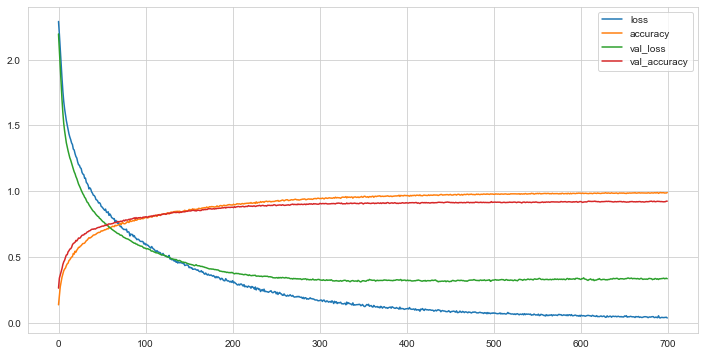

In [94]:
plotHistory(model_3_history)

In [96]:
model_3.save(r'C:\Users\PARTH')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Users\PARTH\assets
